# Modelling The Orbital Flight of Friendship-7 with Python

 I'll be using this document to explore how Python can be a powerful and user friendly language for the modelling of orbital dynamics. Throughout this, I will be using 2 opensource libraries; OrbitalPy and Poliastro.
 Having experimented with both, I conclude that the latter is the more powerful tool, but that OrbitalPy is a great resource for an introduction to orbital dynamics modelling in python.

## Installation of the libraries

The libraries are both open source, and can be installed directly into your python environment using the standard pip install proceedure through your command prompt:

For the orbitalPy library:

```pip install orbitalpy```

and for the poliastro:

```pip install poliastro```

Documentation for [Poliastro]("http://docs.poliastro.space/en/latest/about.html") and [OrbitalPy]("http://pythonhosted.org/OrbitalPy/") can be found here.

Both of these packages are designed to be used with Astropy which can be accessed either by using an astropy specific IDE such as spyder or again, using the pip install command:

```pip install astropy```

Its also hightly recommened that you have Mathplotlib, and Numpy installed as they will be vital for your code to run.

## Setting up a simple orbital model with OrbitalPy

The following code will demonstrate how easy it is to model very simple orbital trajectories using the OrbitalPy library

In [1]:
import matplotlib.pyplot as plt
from orbital import KeplerianElements, earth, Maneuver, plot
from scipy.constants import kilo

orbit_one = KeplerianElements.with_altitude(5000*kilo, body=earth)
plot(orbit_one)


Breaking this code down into its parts:
```KeplerianElements``` itilises the libraries inbuilt computation of the Keplerian Elements of orbital dynamics (which we'll look at in more detail when we move to poliastro).
the ```.with_altitude``` function states that we wish to generated an orbit with an already defined altitide, in this case 5,000km, and the ```body=earth``` refers to the central gravitational body around which the orbit is centered.

Another example would be to use the ```.with_period``` function to calculate an orbit with an already defined orital period

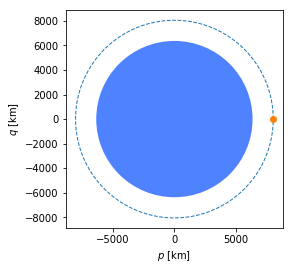

In [2]:
orbit_two = KeplerianElements.with_period(120*60,body=earth)
plot(orbit_two)

Here we have defined an orbit, with a period of 120 minutes around Earth.

### Adding a simple maneuver

Using the ```Maneuver``` comment in Orbitalpy enables you to very easily generate a plot of an initial orbit, then the new orbit after said maneuver. In the following example we'll use the libraries inbuilt Hohmann transfer command to propigate our ```orbit_one``` from 5,000km to 15,000km

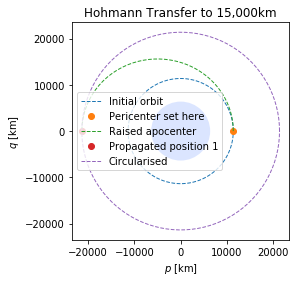

In [3]:
man = Maneuver.hohmann_transfer_to_altitude(15000*kilo)
plot(orbit_one, maneuver=man, title="Hohmann Transfer to 15,000km")

## Orbits with Poliastro

Its my opinion that the poliastro library feels to be a more powerful, but slightly less intuitive library for orbital dynamics. However, what poliastro does bring to the table is the ability to **directly query NASA API's** (for example the NASA Near Earth Object) database.  To define orbital elements in poliastro, we have the ability to directly provide values to the code, either in the form of distance/velocity vectors or from the specific Keplerian Elements mentioned above.

In the case of defining vectors:

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.ion()
from astropy import units as u
from poliastro.bodies import Earth, Mars, Sun
from poliastro.twobody import Orbit
from poliastro.plotting import plot
plt.style.use("seaborn")

r = [-6000,-3500,2500]*u.km # defines the r vector in km
v = [-3.5, 6.6, 2.5]*u.km/u.s # defines the v vector in km/s

orb_vec = Orbit.from_vectors(Earth, r,v)
orb_vec

7245 x 10113 km x 153.4 deg orbit around Earth (♁)

In the case of using the specified Keplerian Elements:

In [5]:
a = 1.523679 * u.AU    # Semi-major Axis
ecc = 0.093315 * u.one # Eccentricity
inc = 1.85 * u.deg     # Orbital Inclination
raan = 49.562 * u.deg  # RA of ascending Node
argp = 286.537 * u.deg # 
nu = 23.33 * u.deg     #

In this case, we define the orbital properties of the planet Mars

In [6]:
orb_kep = Orbit.from_classical(Sun, a, ecc, inc, raan, argp, nu)
orb_kep

1 x 2 AU x 1.9 deg orbit around Sun (☉)

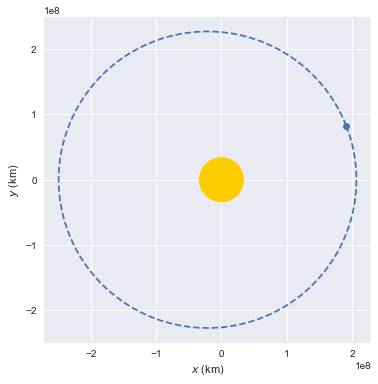

In [7]:
plot(orb_kep)

## Ploting initial orbital flight of Friendship-7

In [16]:
import matplotlib.pyplot as plt
plt.ion()

from astropy import time
from astropy import units as u

from poliastro.bodies import Sun, Earth, Jupiter
from poliastro.twobody import Orbit
from poliastro.plotting import plot, OrbitPlotter3D
from poliastro import iod
from poliastro.util import norm
import matplotlib.pyplot as plt

# Perigee = 149 km
# Apogee = 248 km
# Inclination = 32.5 degrees
# Period = 88.47 Minutes

date_Launch = time.Time("1962-02-20 14:47", scale = 'utc')
date_land = time.Time("1962-02-20 19:43", scale = 'utc')
tof = date_land - date_Launch

print("Time of Flight was: " + str(tof.to(u.h)))

r_per = Earth.R + 149 * u.km
r_apo = Earth.R + 248 * u.km
inc = 32.5 *u.deg

a_parking = (r_per + r_apo) / 2
ecc_parking = 1 - r_per / a_parking

parking = Orbit.from_classical(Earth, a_parking, ecc_parking,
                               inc, 0 * u.deg, 0 * u.deg, 0 * u.deg,  # We don't mind
                               date_Launch)




Time of Flight was: 4.933333397466665 h


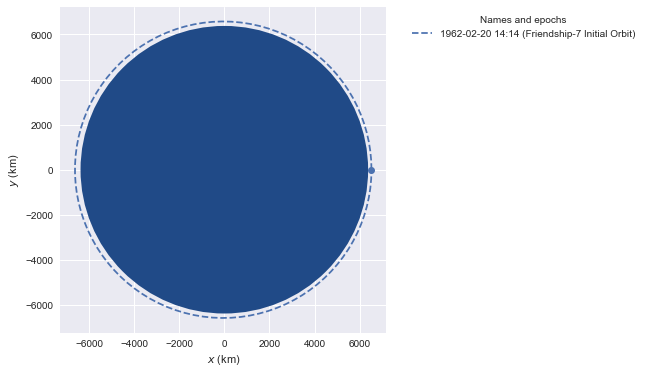

In [14]:
plot(parking,label="Friendship-7 Initial Orbit")